In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
k8_file_path = os.path.join('data', 'temp', 'baseline_rag_result_correctness.csv')
k3_file_path = os.path.join('data', 'temp', 'baseline_rag_result_R3_correctness.csv')

In [3]:
k8df = pd.read_csv(k8_file_path)
k8df.head(3)

,query,reference_contexts,reference_answer,reference_answer_by,query_by,response,retrieved_nodes,reranked_nodes,correct_score,correct_feedback
0,這門課希望學生從使用者變成什麼？,['各位同學大家好 我們來上課吧\n剛才只是用Google的VO3\n這個可以生成影片的人工...,理解者，甚至是創造者。,ai (gpt-5-mini),ai (gpt-5-mini),這門課希望學生從使用者變成理解者，甚至是創造者。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'eba16e20-d000-4b3e-b05a-b1589f6b9fe9'...,5.0,Generated answer matches the reference exactly...
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,['第一種\n如果你未來想要更深入人工智慧領域\n這門可絕對是很好的入門\n當然要完全掌握A...,答案：Google 的 VO3,ai (gpt-5-mini),ai (gpt-5-mini),剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用Google的VO3。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'c9b0c2ac-d7b7-4183-9bcd-6c3d57686b61'...,5.0,生成的回答與使用者問題直接相關，內容正確無誤，與參考答案一致。
2,哪個軟體被用來合成講師的聲音？,['也是VO3自己生成的\n他產生的影片是帶有聲音的\n那其他中文講課的聲音也通通都是合成的...,答案：Eleven Labs。,ai (gpt-5-mini),ai (gpt-5-mini),Eleven Labs這個軟體被用來合成講師的聲音。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'c9b0c2ac-d7b7-4183-9bcd-6c3d57686b61'...,5.0,回答與參考答案完全一致，正確且簡潔明確。


In [4]:
k8df = k8df[['query', 'reference_answer', 'response', 'correct_score', 'correct_feedback']].copy()
k8df.columns = ['query', 'reference_answer', 'k8_response', 'k8_correct_score', 'k8_correct_feedback']
k8df.head(3)

,query,reference_answer,k8_response,k8_correct_score,k8_correct_feedback
0,這門課希望學生從使用者變成什麼？,理解者，甚至是創造者。,這門課希望學生從使用者變成理解者，甚至是創造者。,5.0,Generated answer matches the reference exactly...
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,答案：Google 的 VO3,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用Google的VO3。,5.0,生成的回答與使用者問題直接相關，內容正確無誤，與參考答案一致。
2,哪個軟體被用來合成講師的聲音？,答案：Eleven Labs。,Eleven Labs這個軟體被用來合成講師的聲音。,5.0,回答與參考答案完全一致，正確且簡潔明確。


In [5]:
k3df = pd.read_csv(k3_file_path)
k3df.head(3)

,query,reference_contexts,reference_answer,reference_answer_by,query_by,response,retrieved_nodes,reranked_nodes,correct_score,correct_feedback
0,這門課希望學生從使用者變成什麼？,['各位同學大家好 我們來上課吧\n剛才只是用Google的VO3\n這個可以生成影片的人工...,理解者，甚至是創造者。,ai (gpt-5-mini),ai (gpt-5-mini),這門課希望學生從使用者變成創作者。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': 'f1b8dce2-5b45-4ed8-b44d-0bf6e2306877'...,4.0,回覆與問題高度相關，答案把重點落在「創作者/創造者」，與參考答案的一部分相符；但參考答案還強...
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,['第一種\n如果你未來想要更深入人工智慧領域\n這門可絕對是很好的入門\n當然要完全掌握A...,答案：Google 的 VO3,ai (gpt-5-mini),ai (gpt-5-mini),抱歉，無法提供該工具的資訊。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,2.0,生成的回答與用戶問題相關但不正確且無幫助——用戶詢問具體工具，參考答案為「Google 的 ...
2,哪個軟體被用來合成講師的聲音？,['也是VO3自己生成的\n他產生的影片是帶有聲音的\n那其他中文講課的聲音也通通都是合成的...,答案：Eleven Labs。,ai (gpt-5-mini),ai (gpt-5-mini),沒有提到任何軟體被用來合成講師的聲音。,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,[{'id': '18773912-c8b5-4fb4-8d4b-cb4e38758012'...,2.0,回答與提問相關但事實錯誤：參考答案指出是 Eleven Labs，用「沒有提到任何軟體」作答...


In [6]:
k3df = k3df[['query', 'reference_answer', 'response', 'correct_score', 'correct_feedback']].copy()
k3df.columns = ['query', 'reference_answer', 'k3_response', 'k3_correct_score', 'k3_correct_feedback']
k3df.head(3)

,query,reference_answer,k3_response,k3_correct_score,k3_correct_feedback
0,這門課希望學生從使用者變成什麼？,理解者，甚至是創造者。,這門課希望學生從使用者變成創作者。,4.0,回覆與問題高度相關，答案把重點落在「創作者/創造者」，與參考答案的一部分相符；但參考答案還強...
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,答案：Google 的 VO3,抱歉，無法提供該工具的資訊。,2.0,生成的回答與用戶問題相關但不正確且無幫助——用戶詢問具體工具，參考答案為「Google 的 ...
2,哪個軟體被用來合成講師的聲音？,答案：Eleven Labs。,沒有提到任何軟體被用來合成講師的聲音。,2.0,回答與提問相關但事實錯誤：參考答案指出是 Eleven Labs，用「沒有提到任何軟體」作答...


In [7]:
df = pd.merge(k8df, k3df, how='left', on=['query', 'reference_answer'])
df.head(3)

,query,reference_answer,k8_response,k8_correct_score,k8_correct_feedback,k3_response,k3_correct_score,k3_correct_feedback
0,這門課希望學生從使用者變成什麼？,理解者，甚至是創造者。,這門課希望學生從使用者變成理解者，甚至是創造者。,5.0,Generated answer matches the reference exactly...,這門課希望學生從使用者變成創作者。,4.0,回覆與問題高度相關，答案把重點落在「創作者/創造者」，與參考答案的一部分相符；但參考答案還強...
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,答案：Google 的 VO3,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用Google的VO3。,5.0,生成的回答與使用者問題直接相關，內容正確無誤，與參考答案一致。,抱歉，無法提供該工具的資訊。,2.0,生成的回答與用戶問題相關但不正確且無幫助——用戶詢問具體工具，參考答案為「Google 的 ...
2,哪個軟體被用來合成講師的聲音？,答案：Eleven Labs。,Eleven Labs這個軟體被用來合成講師的聲音。,5.0,回答與參考答案完全一致，正確且簡潔明確。,沒有提到任何軟體被用來合成講師的聲音。,2.0,回答與提問相關但事實錯誤：參考答案指出是 Eleven Labs，用「沒有提到任何軟體」作答...


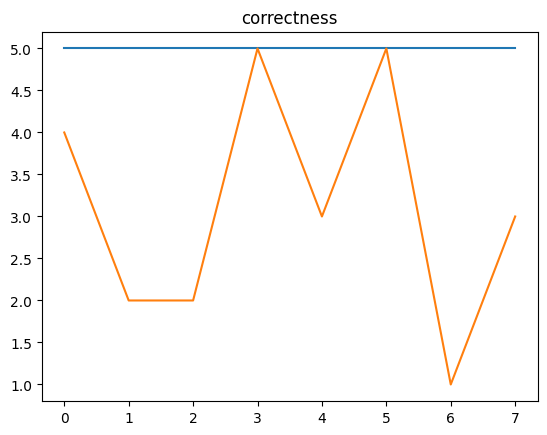

In [8]:
k8_scores = df['k8_correct_score'].tolist()  # retriever: top_k = 8
k3_scores = df['k3_correct_score'].tolist()  # retriever: top_k = 3
plt.title('correctness')
plt.plot(k8_scores)
plt.plot(k3_scores)

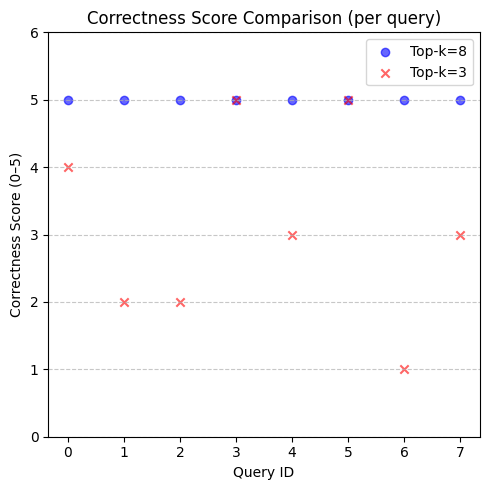

In [14]:
import matplotlib.pyplot as plt

k8_scores = df['k8_correct_score'].tolist()
k3_scores = df['k3_correct_score'].tolist()
x = range(len(k8_scores))

plt.figure(figsize=(5, 5))
plt.title('Correctness Score Comparison (per query)')

# 系統 A (k=8)
plt.scatter(x, k8_scores, label="Top-k=8", marker="o", color="blue", alpha=0.6)

# 系統 B (k=3)
plt.scatter(x, k3_scores, label="Top-k=3", marker="x", color="red", alpha=0.6)

plt.ylim(0, 6)  # y 軸範圍固定在 0–5
plt.xlabel("Query ID")
plt.ylabel("Correctness Score (0–5)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



In [15]:
import numpy as np

print(f'top-k=8: {np.mean(k8_scores)}')
print(f'top-k=3: {np.mean(k3_scores)}')




top-k=8: 5.0
top-k=3: 3.125


In [16]:
df

,query,reference_answer,k8_response,k8_correct_score,k8_correct_feedback,k3_response,k3_correct_score,k3_correct_feedback
0,這門課希望學生從使用者變成什麼？,理解者，甚至是創造者。,這門課希望學生從使用者變成理解者，甚至是創造者。,5.0,Generated answer matches the reference exactly...,這門課希望學生從使用者變成創作者。,4.0,回覆與問題高度相關，答案把重點落在「創作者/創造者」，與參考答案的一部分相符；但參考答案還強...
1,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用哪個工具？,答案：Google 的 VO3,剛才用來生成倒數計時影片和讓人長出翅膀的影片是使用Google的VO3。,5.0,生成的回答與使用者問題直接相關，內容正確無誤，與參考答案一致。,抱歉，無法提供該工具的資訊。,2.0,生成的回答與用戶問題相關但不正確且無幫助——用戶詢問具體工具，參考答案為「Google 的 ...
2,哪個軟體被用來合成講師的聲音？,答案：Eleven Labs。,Eleven Labs這個軟體被用來合成講師的聲音。,5.0,回答與參考答案完全一致，正確且簡潔明確。,沒有提到任何軟體被用來合成講師的聲音。,2.0,回答與提問相關但事實錯誤：參考答案指出是 Eleven Labs，用「沒有提到任何軟體」作答...
3,這門課的上課時間是週五下午幾點幾分開始？,週五下午2點20分開始。,這門課的上課時間是週五下午2點20分開始。,5.0,回答直接且正確地回應了使用者的問題，與參考答案一致（週五下午2點20分開始）。,這門課的上課時間是週五下午2點20分開始。,5.0,Generated answer exactly matches the reference...
4,前兩個作業的截止日期延後到哪一天繳交？,10月17號。,前兩個作業的截止日期延後到10月17號繳交。,5.0,回答直接且正確，明確指出延期後的截止日為10月17號，與參考答案一致。,前兩個作業的截止日期延後到下週一。,3.0,回答與問題相關但不夠精確：參考答案是「10月17號」，而生成回答說「下週一」，可能與參考答案...
5,助教預計在幾月幾號把成績送出？,1月12號,助教預計在1月12號把成績送出。,5.0,答案與參考答案一致，直接且正確地回覆了助教預計送出成績的日期（1月12號）。,助教預計在1月12號把成績送出。,5.0,生成答案與使用者提問完全相關且正確，直接給出「1月12號」作為回覆，與參考答案一致。
6,課程中目前保留需要訓練多少時間的作業？,課程中目前保留需要訓練三到四個小時的作業。,課程中保留需要訓練模型的作業，這些作業通常需要特別花時間，可能長達三到四個小時才能完成。,5.0,回覆與參考答案內容一致，明確指出作業需約三到四個小時的訓練時間，且語意通順、相關且正確。,課程中每一個作業通常留給大家三週的時間來完成，前兩個作業的截止日期特別延後到10月17號。,1.0,回覆未回答使用者詢問的「需要訓練多少時間（小時）」的問題，而是提供作業截止時間與完成週期的資...
7,如果你對生成式AI一無所知，建議先看哪一門課程？,生成式AI導論2024 的課程。,建議先看生成式AI導論2024的課程。,5.0,The generated answer exactly matches the refer...,建議先選修這門課程，因為它提供了基礎的概念講解和實作輔助，適合對生成式AI一無所知的學生。,3.0,回答相關且建議方向正確（推薦先修一門入門課程），但未直接指出具體課程名稱（參考答案為「生成式...
